# Setup

In [1]:
import torch
import torchaudio
import IPython
import matplotlib.pyplot as plt


print(torch.__version__)
print(torchaudio.__version__)

2.0.1+cu117
2.0.2+cu117


# Acquire Signal (Source Stream)

In [17]:
# At a linux terminal, do a "arecord -l". Then select the device number you want to use.
alsadevnum = 2

# Create FFMPEG streamer object
streamer = torchaudio.io.StreamReader(src="hw:0", format="alsa")

In [18]:
print("The number of source streams:", streamer.num_src_streams)
print(streamer.get_src_stream_info(0))

The number of source streams: 1
SourceAudioStream(media_type='audio', codec='pcm_s16le', codec_long_name='PCM signed 16-bit little-endian', format='s16', bit_rate=1536000, num_frames=0, bits_per_sample=0, metadata={}, sample_rate=48000.0, num_channels=2)


# Generate Output Stream

In [19]:
fpc = 144000
out_sample_rate=48000
streamer.add_audio_stream(
    frames_per_chunk=fpc,
    filter_desc=f"aresample={out_sample_rate},anull,aformat=sample_fmts=fltp"
)

In [20]:
print(streamer.num_src_streams)
print(streamer.get_out_stream_info(0))

1
OutputStream(source_index=0, filter_description='aresample=48000,anull,aformat=sample_fmts=fltp')


In [21]:
chunks = next(streamer.stream())

In [22]:
print(type(chunks[0][:,:]))
print(chunks[0][:,1].size()) # torch.Tensor

<class 'torch.Tensor'>
torch.Size([144000])


filter_desc: aresample=48000,anull,aformat=sample_fmts=fltp


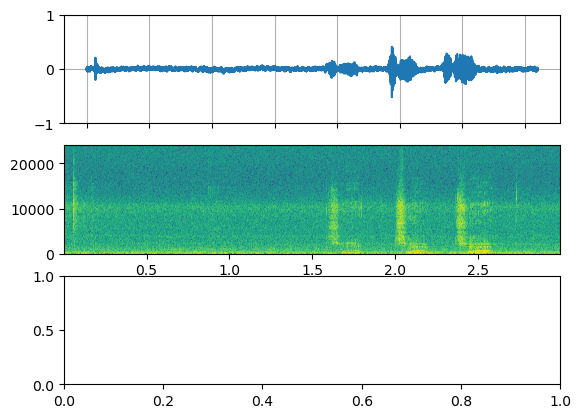

In [23]:
def _display(i):
    print("filter_desc:", streamer.get_out_stream_info(i).filter_description)
    _, axs = plt.subplots(3, 1)
    waveform = chunks[i][:, 0]
    axs[0].plot(waveform)
    axs[0].grid(True)
    axs[0].set_ylim([-1, 1])
    plt.setp(axs[0].get_xticklabels(), visible=False)
    axs[1].specgram(waveform, Fs=out_sample_rate)
    return IPython.display.Audio(chunks[i].T, rate=out_sample_rate)

_display(0)

In [28]:
chunks[0][:, 0]

tensor([ 0.0128,  0.0135,  0.0034,  ..., -0.0049, -0.0054, -0.0037])

# CUDA

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda
